In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import random
import os


In [2]:
random.seed(42)
np.random.seed(42)

In [3]:
out_dir = 'output'
os.makedirs(out_dir, exist_ok=True)

In [4]:
adata= sc.read_h5ad("../nucseq_outs/adata_Nuc.h5ad")

In [5]:
adata.obs['Category']= np.where(adata.obs['sample'].str.contains('CN'), 'Ctrl', 'ANCA_Patient')

## Cntrl Vs ANCA : Overall

/home/zsultana/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


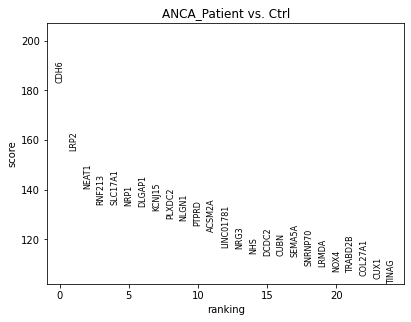

In [7]:
sc.tl.rank_genes_groups(adata, 'Category', groups=['ANCA_Patient'], reference='Ctrl', method='wilcoxon',use_raw=True, pts=True)
sc.pl.rank_genes_groups(adata, groups=['ANCA_Patient'], n_genes=25)

In [8]:
Diff_Genes_ANCA = sc.get.rank_genes_groups_df(adata, group="ANCA_Patient")
Diff_Genes_ANCA.to_csv(os.path.join(out_dir,"Diff_Genes_ANCA.csv"),index=False)

/home/zsultana/.local/lib/python3.9/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()


## Cntrl Vs ANCA : PECs

In [9]:
adata.obs["celltype_l1_Category"]= adata.obs['celltype_l1'].astype(str) + "_" + adata.obs['Category'].astype(str)

/home/zsultana/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


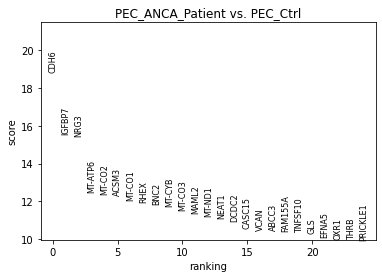

In [10]:
sc.tl.rank_genes_groups(adata, 'celltype_l1_Category', groups=['PEC_ANCA_Patient'], reference='PEC_Ctrl', method='wilcoxon',use_raw=True, 
                       pts=True,logfc=True)
sc.pl.rank_genes_groups(adata, groups=['PEC_ANCA_Patient'], n_genes=25)

In [11]:
Diff_Genes_PEC_ANCA = sc.get.rank_genes_groups_df(adata, group="PEC_ANCA_Patient")
Diff_Genes_PEC_ANCA.to_csv(os.path.join(out_dir,"Diff_Genes_PEC_ANCA.csv"),index=False)

/home/zsultana/.local/lib/python3.9/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()


## Other Method by subsetting PECs first

In [12]:
adata_PEC = adata[adata.obs['celltype_l1'] == 'PEC',:]

In [13]:
adata_PEC.obs['Category'].value_counts()

Category
ANCA_Patient    2336
Ctrl             252
Name: count, dtype: int64

/home/zsultana/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/zsultana/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


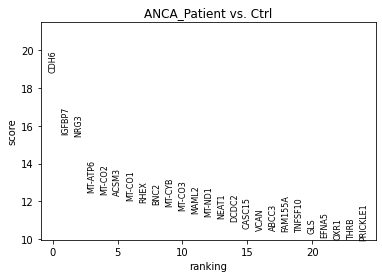

In [14]:
sc.tl.rank_genes_groups(adata_PEC, 'Category', groups=['ANCA_Patient'], reference='Ctrl', method='wilcoxon', use_raw=True, key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata_PEC, n_genes=25, sharey=False, key="wilcoxon")

/home/zsultana/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


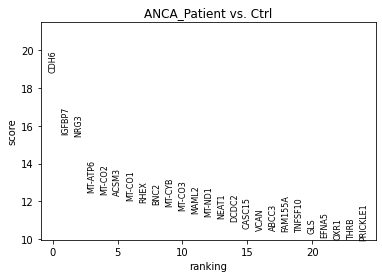

In [15]:
sc.tl.rank_genes_groups(adata_PEC, 'Category', groups=['ANCA_Patient'], reference='Ctrl', method='wilcoxon',use_raw=True, pts=True)
sc.pl.rank_genes_groups(adata_PEC, groups=['ANCA_Patient'], n_genes=25)

In [16]:
Diff_Genes_PEC_ANCA_v2 = sc.get.rank_genes_groups_df(adata_PEC, group="ANCA_Patient")
Diff_Genes_PEC_ANCA_v2.to_csv(os.path.join(out_dir,"Diff_Genes_PEC_ANCA.csv"),index=False)

/home/zsultana/.local/lib/python3.9/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()


In [17]:
Diff_Genes_PEC_ANCA_v2

,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group
0,CDH6,18.819456,4.971034,5.231850e-79,1.737183e-74,0.779110
1,IGFBP7,15.547451,2.875345,1.655658e-54,1.832483e-50,0.810788
2,NRG3,15.456943,3.054313,6.773825e-54,5.622952e-50,0.809075
3,MT-ATP6,12.504777,2.439852,7.029680e-36,2.593483e-32,0.920377
4,MT-CO2,12.378598,2.420685,3.412524e-35,1.133094e-31,0.933647
...,...,...,...,...,...,...
33199,ACSM2A,-12.776124,-2.667674,2.229034e-37,9.251607e-34,0.386986
33200,SYNE2,-13.159010,-1.280044,1.510530e-39,7.165090e-36,0.885274
33201,FKBP5,-13.674552,-2.445658,1.440929e-42,7.974101e-39,0.420805
33202,PTH2R,-14.702441,-2.049240,6.217722e-49,4.129065e-45,0.749572


## DEG:TGFb and PDGF pathways

In [18]:
df = pd.read_csv(os.path.join(out_dir,"Diff_Genes_PEC_ANCA.csv"))

## PDGF pathway
goi = [ 'STAT1', 'PRKCA', 'NRG1', 'ADAMTS1']
PDGF_pathwaygenes = df[df['names'].isin(goi)]
PDGF_pathwaygenes

,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group
108,NRG1,7.262088,2.114858,3.811609e-13,8.728323e-11,0.399829
109,ADAMTS1,7.244740,2.933600,4.332687e-13,9.853598e-11,0.328767
119,STAT1,7.081914,1.935406,1.421767e-12,2.976694e-10,0.402825
457,PRKCA,4.495819,0.820778,6.930269e-06,4.116505e-04,0.565497


In [19]:
df = pd.read_csv(os.path.join(out_dir,"Diff_Genes_PEC_ANCA.csv"))

## TGFB pathway
goi = ['BMPR1A', 'BMPR2', 'NCOR2', 'UBE2D3', 'NOX4', 'COL4A1']
TGFB_pathwaygenes = df[df['names'].isin(goi)]
TGFB_pathwaygenes

,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group
37,NOX4,9.062137,2.223059,1.279197e-19,7.865643e-17,0.517551
100,BMPR2,7.454019,1.487759,9.053938e-14,2.312515e-11,0.560788
143,COL4A1,6.619745,1.377514,3.598179e-11,6.354997e-09,0.508562
151,NCOR2,6.492635,1.501552,8.434809e-11,1.414492e-08,0.426370
245,BMPR1A,5.579744,1.272326,2.408732e-08,2.632919e-06,0.407106
276,UBE2D3,5.332222,1.327432,9.701850e-08,9.502662e-06,0.369007


In [20]:
df = pd.read_csv(os.path.join(out_dir,"Diff_Genes_ANCA.csv"))

## Ligands
goi = ['TGFB1', 'PDGFC']
ligands = df[df['names'].isin(goi)]
ligands

,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group
183,PDGFC,59.921150,1.200719,0.000000e+00,0.000000e+00,0.376588
4984,TGFB1,14.529234,1.182989,7.910056e-48,4.893711e-47,0.070117
